# Quickstart
The following notebook introduces `iconspy`'s datatypes and some of their associated methods.

Having followed through this tutorial you will be able to construct and visusalise `iconspy` sections.

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import iconspy as ispy

----Start loading pyicon.
Loading default parameters from /home/m/m301014/.conda/envs/ispy_py311/lib/python3.11/site-packages/pyicon/params_default.json.
----Start loading pyicon.
----Pyicon was loaded successfully.
----Pyicon was loaded successfully.


## Load and prepare the example data

We will load from netcdf files as `tgrid` which describes the model grid, and an `fxgrid` which contains bathymetry information.

We then have to put them in a format that `iconspy` can understand. For the `tgrid` this means calling `ispy.convert_tgrid_data`, and for the the `fxgrid` we must make sure the dimensions have the correct names.

In [2]:
shared_data_path = Path("/pool/data/ICON/oes/input/r0006/")
R02B04_path = shared_data_path / "icon_grid_0036_R02B04_O"
grid_path = R02B04_path / "R2B4_ocean-grid.nc"
fx_path = R02B04_path / "R2B4L40_fx.nc"

ds_tgrid = xr.open_dataset(grid_path)  # horizontal grid information
ds_fx = xr.open_dataset(fx_path)  # Contains bathymetry etc.

# Put datasets into the iconspy format
ds_IsD = ispy.convert_tgrid_data(ds_tgrid)

ds_fx = ds_fx.rename(
    {
        "ncells": "cell",
        "ncells_2": "edge",
        "ncells_3": "vertex",
    }
)



/work/mh0256/m301014/iconspy/iconspy/utils.py:205: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  ds_IcD[point] = np.arange(ds_IcD.dims[point], dtype="int32")


## Define the stations we want to connect
To define a section we need two or more points to connect. Typically we have a rough idea of where we want these points to be, and we would like to choose the model grid points closest to these coordinates. Sometimes we have a desire for one of the points to be on land.

In the below we will define a section near Fram Strait, stretching from a point on Greenland to a point offshore.

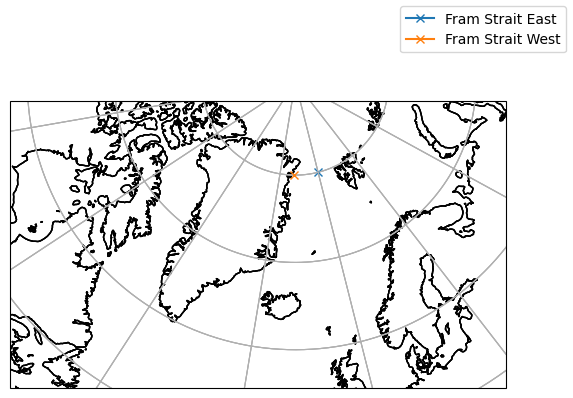

In [3]:
# Put in the approximate coordinates of the points we want
# Specift that we want the Fram Strait West point to be on the boundary
target_fram_strait_west = ispy.TargetStation("Fram Strait West", -16, 80, boundary=True)
target_fram_strait_east = ispy.TargetStation("Fram Strait East", 0, 80, boundary=False)

fig, ax = ispy.utils.setup_figure_area()

target_fram_strait_east.plot(ax=ax)
target_fram_strait_west.plot(ax=ax)

fig.legend()


The map shows the approximate location of the points we want to join. We can now find the model grid points nearest to them and plot them.

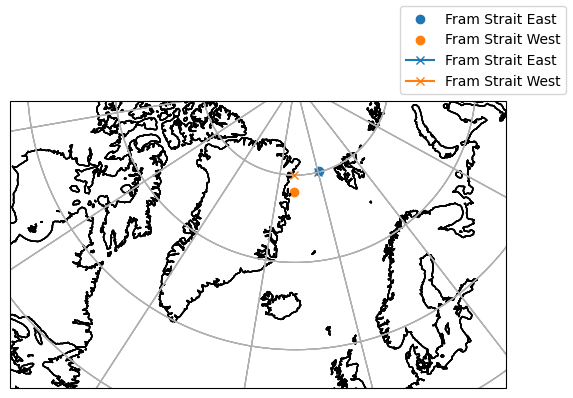

In [ ]:
# Convert the target stations to model stations
fram_strait_west = target_fram_strait_west.to_model_station(ds_IsD)
fram_strait_east = target_fram_strait_east.to_model_station(ds_IsD)

fig, ax = ispy.utils.setup_figure_area()

# Plot the model stations (circles)
fram_strait_east.plot(ax=ax)
fram_strait_west.plot(ax=ax)

# Compare with the target station (crosses)
target_fram_strait_east.plot(ax=ax)
target_fram_strait_west.plot(ax=ax)

fig.legend()


## Connect stations to form a section

### iso-lat/iso-lon

### great circle

### depth contour

### custom weights
